# Capstone Project 1 - Milestone Report

## Abstract
### *To be revised*
Hourly PM2.5 data for five major Chinese cities are analyzed, so as their correlations with other meteorological weather data. The key findings are: 
* PM2.5 records are fairly consistency among nearby stations in all five cities.
* PM2.5 levels vary siginificantly among cities. The rankings of PM2.5 from the lowest to the highest are Guangzhou, Shanghai, Chengdu and Shenyang, Beijing. This corresponds to the air quality from the best to the worse, respectively.
* Time-dependent daily, weekly, monthly, seasonal and yearly trends of PM2.5 reveal that PM2.5 level varies systematically with hour of the day, month/season of the year and from year to year, whereas no dependence and minor variation of PM2.5 on day of the week are observed; PM2.5 daily and monthly/seasonal trends are unique with individual cities, but yearly trend from 2010 to 2015 shows a consistent decrease in PM2.5 levels among five cities.
* Correlations with meteorological weather data reveal that both high winds and large precipitations help to reduce high PM2.5 levels in all five cities; The dependence of PM2.5 on wind directions is unique for each city, as determined by location and neighbour environment; PM2.5 levels are also negatively correlated to temperature and dew point, and positively correlated to pressure and humidity. In particular, higher PM2.5 levels occur more frequently at weather conditions of lower temperatures, lower dew points, higher atmospheric pressures and higher humidity levels. 

## 1. Introduction

### 1.1 Problem

<p>In recent years, air pollution has become an increasingly severe problem in China due to rapid industrialization and high energy consumption. The thick haze and smog, characteristic of unhealthy air condition, raise intense public concerns and media attentions, as it has been linked to the increased occurrence of various respiratory diseases and resident mortality rates. According to reports, PM2.5 (ultrafine particles less than 2.5 microns in diameter) is the main pollutant accountable for at least two thirds of the severely polluted days in Chinese major cities, posting a significant threat to human health.</p>
<p>China has started the PM2.5 monitoring and reporting program in major cities since early 2013, and has extended to 388 cities by 2015. In addition, PM2.5 data prior to 2013 are available from US embassy in major Chinese cities. However, besides live monitoring and reporting, understanding PM2.5 trends and building a PM2.5 prediction system are strongly desired. With predictions, government and citizens can plan ahead and take actions accordingly.</p>

### 1.2 Approach

<p>In this project, we study the PM2.5 trends and its correlation to a variety of weather conditions, using the public datasets by UCI Repository containing hourly PM2.5 measurements for five major Chinese cities along with many other meteorological readings collected during the period of 2010-2015. Graphical and statistifcal EDA are performed to understand the time trends of PM2.5 variation, cross-city comparison of PM2.5 diversity and its correlation to a variety of weather conditions, such as emperature, humidity, pressure, wind direction and speed, precipitation, etc. A predictive machine learning model is created and optimized for predicting future PM2.5 levels.</p>

### 1.3 Impact

<p>A PM2.5 predictive model is beneficial to people at all levels in China, ranging from Chinese government, local organizations to individual citizens. Government can use this model to predict air quality, provide outdoor activity guideline for adults and children and issue appropriate warnings in advance. Local organizations can benefit from the model prediction to plan outdoor events, schedule emergency facility shutdowns when necessary. Individual citizens can also consult this predictive model to plan their commute choices, better schedule their daily outdoor activities to take full advantage of the clear sky hours and wear protective mask and clothings. The predictive model with reasonable accuracy will enable people to plan ahead accordingly, reducing the hassles and economical loss due to last minute changes as well as avoiding the exposure to extremely unhealthy air.</p>

### 1.4 Dataset
<p>PM2.5 data are acquired from UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities and https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data. The first dataset contains hourly PM2.5 measurements for five Chinese cities (Beijing included), along with many other meteorological readings collected during the period of 2010-2015. These meteorological readings include dew point, temperature, humidity, pressure, combined wind direction, cumulated wind speed and hourly precipitation etc. The second dataset contains similar measurements for city Beijing alone during the period of 2010-2014. In this project, we focus on the first dataset, but also taking into consideration the ‘cumulative hours of snow’ and ‘cumulative hours of rain’ for city Beijing from the second dataset.</p>

## 2. Data Acquisition and Cleaning

<p>The raw data files are acquired from UCI Repository at: 1) https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities and 2) https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data, and downloaded as csv files. Files ‘beijing.csv’, ’shanghai.csv’, ‘guangzhou.csv’, ‘chengdu.csv’ and ‘shenyang.csv’ from the first link contain the hourly PM2.5 measurements for five major Chinese cities respectively, along with many other meteorological readings collected during the period of 2010-2015. These meteorological readings include dew point (‘DEWP’), temperature(‘TEMP’), humidity(‘HUMI’), pressure(‘PRES’), combined wind direction(‘cbwd’), cumulative wind speed (‘Iws’), hourly precipitation (‘precipitation’) and cumulative precipitation (‘Iprec’). File ‘beijing_2.csv’ from the second link contains similar hourly measurement data for city Beijing alone during the period of 2010-2014, with two unique columns, cumulative hours of snow (‘Is’) and cumulative hours of rain (‘Ir’).</p>
    
<p>The raw data is composed of 306744 rows and 30 columns, containing a combination of time-related records and various measurements taken at multiple stations in each city for a total of five cities in China from year 2010 to 2015. Both missing data and outliers are present. The following data wrangling strategies are used to clean up the raw data:
<li>Two additional columns are added: <br> **'date_time'** time-related information is recorded in separated columns as 'year', 'month', 'day', 'hour' and 'season' in the raw data. For EDA purposes, a DateTime formatted column is created. <br>**'pm_average'** Hourly PM2.5 readings from multiple stations are recorded for each city in the raw data. There's no reason to choose the PM2.5 reading from one station over others, therefore it's most representative to use the average PM2.5 readings in EDA and Modeling. A column 'pm_average' representing the average of pm2.5 readings from multiple stations of the same city is computed and added to the clean dataset. On the other hand, PM2.5 readings from individual stations are extracted separately to compare the measurement consistency among stations for each city.
<li>The raw dataset pm_raw will be separated into three separate subsets for cleaning, EDA and modeling:<br>
    **pm_clean** this is the main dataset containing the measurement data for all five cities, here the average pm2.5 reading for each city is used instead of pm2.5 data from individual stations<br>
    **pm_stations** this is a side dataset containing station-specific individual PM2.5 readings. This dataset serves the purpose of comparing the measurement consistency among stations for each city.<br>
    **pm_sr** this is also a side dataset containing information on cumulated hours of snows and rains for city 'beijing'. This dataset serves the purpose of comparing the impact of snow versus rain on PM2.5 readings.<br>
<li>Missing values and outliers will be evaluated and addressed within each subset. 

In [10]:
# import relevant modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

### 2.1 Import raw csv files

In [22]:
dfs=[] # empty list to temperarily store individual dataframes for future concatenation

citynames = ['beijing','shanghai','guangzhou','chengdu','shenyang','beijing_2']
for cityname in citynames:
    df = pd.read_csv('datasets/{}.csv'.format(cityname)) # import all six csv files as dataframes
    df['city'] = cityname  # add a new column to label the city each observation is associated with
    dfs.append(df) # append each df to the list dfs

pm_raw=pd.concat(dfs, sort=False) # concatenate all dfs into a single dataframe named pm_raw
pm_raw=pm_raw.reset_index(drop=True) # reset index

### 2.2 Clean up the main data (pm_clean)
pm_clean is the main set extracted from the raw data (pm_raw). It contains PM2.5 measurements as well as all the meteorological data for all five cities. The average pm2.5 levels of each city is used in this dataset instead of the pm2.5 readings from individual stations.

In [12]:
pm_clean = pm_raw[['year','month','day','hour','season','DEWP','HUMI','PRES','TEMP','cbwd','Iws','precipitation','Iprec','city']]
pm_clean = pm_clean[pm_clean['city'] != 'beijing_2'] # drop irrelevant rows
pm_clean.reset_index(drop=True,inplace=True) # update index
pm_clean.columns=pm_clean.columns.str.lower() # update column names to all lowercases

In [13]:
# add a new column 'pm_average' as the average pm2.5 readings from multiple stations in the same city

stations = ['PM_US Post','PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_Jingan','PM_Xuhui','PM_City Station','PM_5th Middle School','PM_Caotangsi','PM_Shahepu','PM_Taiyuanjie','PM_Xiaoheyan']
# calculate the mean pm2.5 readings across all pm2.5 stations (mean across relevant rows using axis=1)
pm_average = pm_raw[pm_raw['city'] != 'beijing_2'].loc[:,stations].mean(axis=1,skipna=True)
pm_average.name='pm_average'
pm_clean = pd.concat([pm_clean,pm_average], axis=1) #append pm_average to pm_clean horizontally

In [14]:
# for plotting purposes, add a new DateTime format column 'date_time' from time-related columns ('year','month','day','hour')

pm_clean['date_time']='' # initialize an empty column
# iterate through 'year','month','day','hour' columns, convert int/float to string type, append to 'date_time' column
for idx, col in enumerate(pm_clean.columns[0:4]):
    to_str = pm_clean[col].astype(str)
    # for 'month','day' and 'hour', update all string lengths to 2 by filling in 0 from the left  
    to_str = pd.Series([('0'+ entry) if len(entry) < 2 else entry for entry in to_str])   
    pm_clean['date_time'] += to_str
    
pm_clean['date_time'] = pd.to_datetime(pm_clean['date_time'], format='%Y%m%d%H') # convert to DateTime format

In [15]:
# drop rows with missing average PM2.5 data and missing 'season' label

print("numbers of rows before dropping:", len(pm_clean))
pm_clean.dropna(subset=['pm_average','season'],inplace=True)
print("numbers of rows after dropping:", len(pm_clean))
pm_clean.reset_index(drop=True,inplace=True) # update index

numbers of rows before dropping: 262920
numbers of rows after dropping: 175244


In [16]:
# update formats

pm_clean['season'] = pm_clean['season'].astype(int) # convert the data type from float to int for 'season' column
pm_clean['cbwd'] = pm_clean['cbwd'].str.upper() # update entries to all uppercases for 'cbwd' column

In [17]:
# identify and fix outliers
# summary statistics, histogram and boxplot are used to inspect all numerical columns
# entries near potential outliers are inspected to confirm and the outliers are replaced by nearby entries

print(pm_clean['precipitation'].idxmax()) # print out the outlier index in the 'precipitation' column
pm_clean.loc[49383,'precipitation']= pm_clean.loc[49382,'precipitation'] # replace outlier with value in its nearby entry

print(pm_clean['iprec'].idxmax()) # print out the outlier index in the 'iprec' column
pm_clean.loc[49383,'iprec']= pm_clean.loc[49382,'iprec'] # replace outlier with value in its nearby entry

print(pm_clean['dewp'].idxmin()) # print out the outlier index in the 'dewp' column
pm_clean.loc[100931:100934,'dewp']= (pm_clean.loc[100930,'dewp'] + pm_clean.loc[100935,'dewp'])/2 # replace outlier with the average value in its nearby entries

print(pm_clean['humi'].idxmin()) # print out the outlier index in the 'humi' column
pm_clean.loc[100931:100934,'humi']= pm_clean.loc[100930,'humi'] # replace outlier with value in its nearby entry

49383
49383
100931
100931


### 2.3 Clean up side data (pm_stations, pm_sr)
pm_stations is a side dataset extracted from the raw data (pm_raw), storing the station-specific individual PM2.5 readings, and serves the purpose of comparing the measurement consistency among stations for each city.
pm_sr is also a side dataset extracted from the raw data (pm_raw), containing information on cumulated hours of snows and rains in city 'beijing-2' for comparing the impact of snow versus rain on PM2.5 readings.

In [18]:
pm_stations = pm_raw[['year','month','day','hour','season','city','PM_US Post','PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_Jingan','PM_Xuhui','PM_City Station','PM_5th Middle School','PM_Caotangsi','PM_Shahepu','PM_Taiyuanjie','PM_Xiaoheyan']]

pm_stations = pm_stations[pm_stations['city'] != 'beijing_2'] # drop irrelevant rows
pm_stations.reset_index(drop=True,inplace=True) # update index
pm_stations.columns=pm_stations.columns.str.lower() # update column names to all lowercases

# drop rows where data in pm-related columns are all missing
stations=['pm_us post','pm_dongsi','pm_dongsihuan','pm_nongzhanguan','pm_jingan','pm_xuhui','pm_city station','pm_5th middle school','pm_caotangsi','pm_shahepu','pm_taiyuanjie','pm_xiaoheyan']
pm_stations.dropna(how='all',inplace=True, subset=stations)
pm_stations.reset_index(drop=True,inplace=True) # update index

pm_stations.loc[118857,'season'] = pm_stations.loc[118856,'season'] # replace the missing entry in 'season' column with its nearby entry
pm_stations['season'] = pm_stations['season'].astype(int) # convert the data type in 'season' column from float to int

In [19]:
# add a new DateTime format column 'date_time' from time-related columns ('year','month','day','hour') and set as index

pm_stations['date_time']='' # initialize an empty column
# iterate through 'year','month','day','hour' columns, convert int/float to string type, append to 'date_time' column
for idx, col in enumerate(pm_stations.columns[0:4]):
    to_str = pm_stations[col].astype(str)
    # for 'month','day' and 'hour', update all string lengths to 2 by filling in 0 from the left  
    to_str = pd.Series([('0'+entry) if len(entry) < 2 else entry for entry in to_str])   
    pm_stations['date_time'] += to_str
    
pm_stations['date_time'] = pd.to_datetime(pm_stations['date_time'], format='%Y%m%d%H') # convert to DateTime format
pm_stations.set_index('date_time',inplace=True) # set as DateTime index

In [20]:
pm_sr = pm_raw[['year','month','day','hour','city','DEWP','PRES','TEMP','cbwd','Iws','pm2.5','Is','Ir']]

pm_sr = pm_sr[pm_sr['city'] == 'beijing_2'] # drop irrelevant rows
pm_sr.columns=pm_sr.columns.str.lower() # update column names to all lower cases
pm_sr.dropna(subset=['pm2.5'],inplace=True) # drop rows with missing 'pm2.5' values
pm_sr.reset_index(drop=True,inplace=True) # update index

### 2.4 Cleaned datasets
insert figure using <img src="subdirectory/MyImage.png",width=60,height=60> to show the columns, unit, descriptions for each cleaned dataset

## 3. Exploratory Data Analysis and Inferential Statistics
### 3.1 PM2.5 consistency across stations
Prior to any other EDA, the inter-station comparison are performed to verify the PM2.5 measurement consistency among stations in the same city. This consistency check is of great importance, as it lays the fundation of using the average PM2.5 levels of all stations instead of station-specific PM2.5 data in all future analysis. Below is an example showing the inter-station comparison for city Beijing.

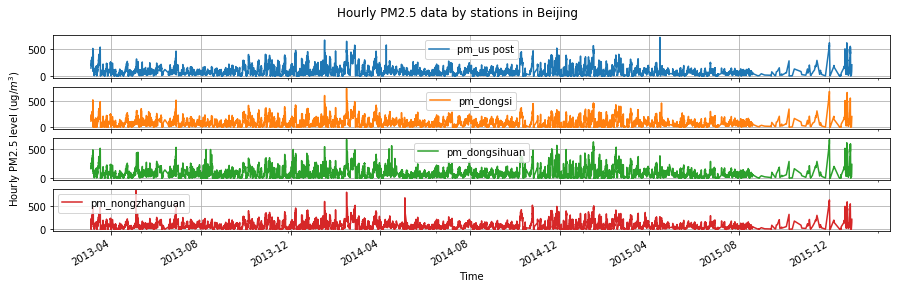

In [93]:
# extract stations PM2.5 data for Beijing
stations_bj = pm_stations[['pm_us post','pm_dongsi','pm_dongsihuan','pm_nongzhanguan']].dropna()

# plot hourly PM2.5 data by station
stations_bj.plot(subplots=True, grid=True, figsize=(15, 4), title='Hourly PM2.5 data by stations in Beijing');
plt.xlabel('Time');
plt.ylabel('Hourly PM2.5 level (ug/$m^3$)', y=2.2);

Graphic EDA verifies that the PM2.5 readings are fairly consistent among individual stations for all five cities, with peaks and valleys aligned and summary statistics comparable to each other. Given that PM2.5 readings are consistent among stations of the same city, the average PM2.5 levels, labeled as 'pm_average', are used in all future EDA and modeling.

### 3.2 PM2.5 diversity among cities
To understand how the air quality (PM2.5) varies with cities, PM2.5 levels are compared among cities: 1) time series PM2.5 data are plotted along with EPA standards for PM2.5 to compare the trends; 2) cumulative density function and boxplot are created to provide a more quantitative comparison.

In [95]:
# extract data for each city
bj = pm_clean[pm_clean['city']=='beijing'] # city 'beijing'
cd = pm_clean[pm_clean['city']=='chengdu'] # city 'chengdu'
gz = pm_clean[pm_clean['city']=='guangzhou'] # city 'guangzhou'
sh = pm_clean[pm_clean['city']=='shanghai'] # city 'shanghai'
sy = pm_clean[pm_clean['city']=='shenyang'] # city 'shenyang'

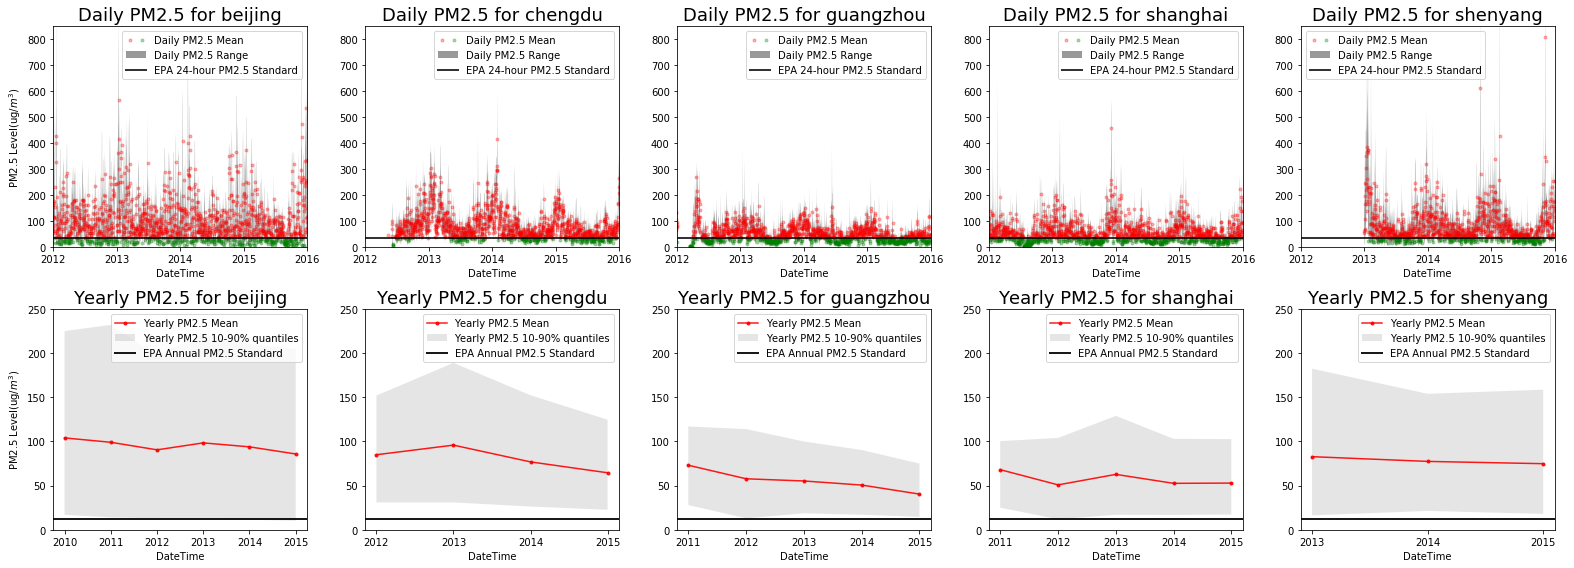

In [112]:
# compute resampled daily and yearly PM2.5 levels and plot by city

from matplotlib.legend_handler import HandlerTuple
i, j = 1, 6
fig = plt.figure(figsize=(22,8))

for city in (bj,cd,gz,sh,sy):
    ### daily PM2.5 levels using resampling by day###    
    daily_mean = city.reset_index(drop=True).set_index('date_time').resample('D')['pm_average'].mean() # extract daily mean
    daily_max = city.reset_index(drop=True).set_index('date_time').resample('D')['pm_average'].max() # extract daily max
    daily_min = city.reset_index(drop=True).set_index('date_time').resample('D')['pm_average'].min() # extract daily min
    daily = pd.concat([daily_mean, daily_max, daily_min], axis=1) # concatenate daily mean, max and min for plotting
    daily.columns = ['pm_daily_mean','pm_daily_max','pm_daily_min']
    
    # plot daily pm2.5 mean, max and min vs EPA PM2.5 standard
    daily_standard = 35
    daily_above = daily[daily['pm_daily_mean'] > daily_standard]
    daily_below = daily[daily['pm_daily_mean'] <= daily_standard]
    ax = fig.add_subplot(2,5,i)
    red, = ax.plot(daily_above.index, daily_above['pm_daily_mean'], color='red', marker='.',linestyle='none', alpha=0.3)
    green, = ax.plot(daily_below.index, daily_below['pm_daily_mean'], color='green', marker='.',linestyle='none', alpha=0.3)
    grey = ax.fill_between(daily.index, daily['pm_daily_max'], daily['pm_daily_min'], facecolor='grey',alpha=0.8)
    ax.set_xlim(['2012','2016']);
    ax.set_xticks(['2012','2013','2014','2015','2016']);
    ax.set_ylim([0,850]);
    black = ax.axhline(daily_standard, linewidth=2, color='black',alpha=0.8) # horizontal line to highlight EPA standard of 24-hour PM2.5
    ax.legend([(red,green),grey,black],['Daily PM2.5 Mean','Daily PM2.5 Range','EPA 24-hour PM2.5 Standard'],handler_map={tuple: HandlerTuple(ndivide=None)});
    ax.set_xlabel('DateTime');
    if i == 1:
        ax.set_ylabel('PM2.5 Level(ug/$m^3$)');
    ax.set_title('Daily PM2.5 for {}'.format(city['city'].unique()[0]), fontdict={'fontsize':18});
    i += 1
    
    ### yearly PM2.5 levels using resampling by year###  
    yearly_mean = city.reset_index(drop=True).set_index('date_time').resample('A')['pm_average'].mean() # yearly mean
    yearly_90 = city.reset_index(drop=True).set_index('date_time').resample('A')['pm_average'].quantile(0.9) # yearly 90% quantile
    yearly_10 = city.reset_index(drop=True).set_index('date_time').resample('A')['pm_average'].quantile(0.1) # yearly 10% quantile
    yearly = pd.concat([yearly_mean, yearly_90, yearly_10], axis=1) # concatenate yearly mean, 10% 90% quantiles for plotting
    yearly.columns = ['pm_yearly_mean','pm_yearly_90%','pm_yearly_10%']
    
    # plot yearly pm2.5 mean, 10% and 90% quantiles vs EPA PM2.5 standard
    yearly_standard = 12
    ax = fig.add_subplot(2,5,j)
    red, = ax.plot(yearly.index, yearly['pm_yearly_mean'], marker='.', color='red',alpha=0.9)
    grey = ax.fill_between(yearly.index, yearly['pm_yearly_90%'], yearly['pm_yearly_10%'], facecolor='grey',alpha=0.2)
    ax.set_xticks(yearly.index);
    ax.set_ylim([0,250]);
    black = ax.axhline(yearly_standard, linewidth=2, color='black',alpha=0.9) # horizontal line to highlight EPA standard of annual PM2.5
    ax.legend([red, grey, black],['Yearly PM2.5 Mean','Yearly PM2.5 10-90% quantiles','EPA Annual PM2.5 Standard']);
    ax.set_xlabel('DateTime');
    if j == 6:
        ax.set_ylabel('PM2.5 Level(ug/$m^3$)');
    ax.set_title('Yearly PM2.5 for {}'.format(city['city'].unique()[0]),fontdict={'fontsize':18});
    j += 1

plt.tight_layout();

<p>According to the United States Environmental Protection Agency (EPA), the national particle pollution standards for particulate matter(PM) have been set to protect public health, including the health of "sensitive" populations such as asthmatics, children, and the elderly, as well as to protect public welfare, including protection against decreased visibility, damage to animals, crops, vegetation, and buildings. EPA has established PM2.5 standards that specifically addressed particles smaller than 2.5 microns (PM2.5) since 1997. According to the latest revisions by EPA, the national 24-hour PM2.5 standard is 35 μg/m3 (September, 2006) and the annual PM2.5 standard is 12μg/m3 (December, 2012).</p>

As shown above: 
* Guangzhou has the lowest PM2.5 levels (best air quality), followed by Shanghai, Chengdu and Shenyang, whereas Beijing has the highest average PM2.5 levels and the most widely spreaded daily PM2.5 levels. 
* Five cities all have distinct PM2.5 spikes, as peak PM2.5 readings can result from many factors, for instance, local temperature, wind, etc. These factors are city specific, therefore PM2.5 spikes are not overlapping. 
* Five cities share similar trends over time: PM2.5 readings are relative higher with larger fluctuations during winter periods and lower with smaller fluctuations in summers.
* When compared with the daily and annual EPA standards, most of the daily average PM2.5 levels fail to meet the EPA standard for 24-hour PM2.5 level, and none of the annual PM2.5 levels meet the EPA standard for annual PM2.5 level. This indicates that although PM2.5 levels are gradually improving over time in Chinese major cities, but they are still too high to be considered healthy and safe by EPA standards, and the air quality problems in China still desire a lot of attention and effort.

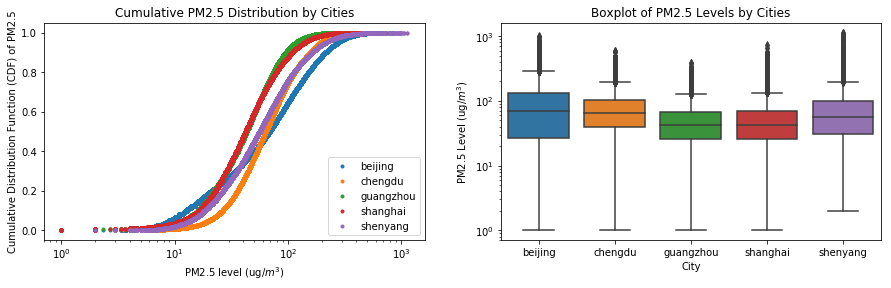

In [116]:
# plot cumulative distribution function (CDF) and boxplot of hourly PM2.5 readings by city

fig = plt.figure(figsize=(15,4))
pmbycity = pm_clean.pivot(index='date_time',columns='city',values='pm_average') # pivot by 'city' to extract city-specific PM2.5 data

# CDF plot by city
def cdf(array):
    """Compute CDF for 1D array of measurement data."""
    x = np.sort(array) # sort array to use as the x axis   
    y = np.arange(1, len(array)+1)/len(array) # use np.arange to create the y axis for cdf from 1/len to 1
    return x,y # return x and y as the data for x axis and y axis, repectively

ax1 = fig.add_subplot(1,2,1)
for city in pmbycity.columns: # Compute ECDFs for five cities, and plot all ECDFs on the same plot
    series = pmbycity[city].dropna()
    x, y = cdf(series)
    ax1.plot(x, y, marker = '.', linestyle='none');
plt.xscale('log');  # use logrithmic scale to see the features at low PM2.5 levels
plt.legend(pmbycity.columns, loc='lower right');
plt.xlabel('PM2.5 level (ug/$m^3$)');
plt.ylabel('Cumulative Distribution Function (CDF) of PM2.5');
plt.title('Cumulative PM2.5 Distribution by Cities');

# boxplot by city
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(data=pmbycity, ax=ax2);
plt.yscale('log'); # set y axis to logrithmic scale for better visualization of the interquantile range
plt.xlabel('City');
plt.ylabel('PM2.5 Level (ug/$m^3$)');
plt.title('Boxplot of PM2.5 Levels by Cities');

As shown, the CDF curves reveal significant differences among five cities:
* Beijing: Beijing has the widest PM2.5 spread among the five cities. Although it has more days of low PM2.5 readings (clear sky and healthy air), it also has more days of extremely high PM2.5 readings (smog and unhealthy air) than the other four cities. On average, it has the highest median PM2.5 level among five cities; 
* Chengdu: Chengdu has high PM2.5 readings in general, with its median ranked second to the highest;
* Guangzhou: Guangzhou has lower PM2.5 readings than all others, and its median is also among the lowest. It also has the fewest days of high PM2.5 readings;
* Shanghai: Shanghai also has low PM2.5 readings overall, with its median lies among the lowest. But it has more days of high PM2.5 readings than Guangzhou; 
* Shenyang: Shenyang has lower PM2.5 readings than Chengdu for the most part, but it has more days of extremely high PM2.5 readings than Chengdu. 

The boxplot agrees with CDF plots, indicating that the air quality ranking from the best to the worst are: Guangzhou, Shanghai, Chengdu/Shenyang, Beijing. Among the five, Guangzhou has the most consistent low PM2.5 readings, whereas Beijing has the largest spread of PM2.5 readings.

### 3.3 PM2.5 trends over time
Hourly PM2.5 levels are plotted vs hour of the day, day of the week, month of the year, season of the year, as a function of different years to understand the daily, weekly, monthly, seasonal and yearly air quality variations in each city. Trends of PM2.5 vs hour of the day, month of the year and from year to year are shown below by city.
(Weekly and seasonal trends are hidden here, as weekly trends show only minor fluctuations with no clear trend and no difference between weekdays and weekends. Seasonal trends are fairly consistent with monthly trends, therefore are not shown.)

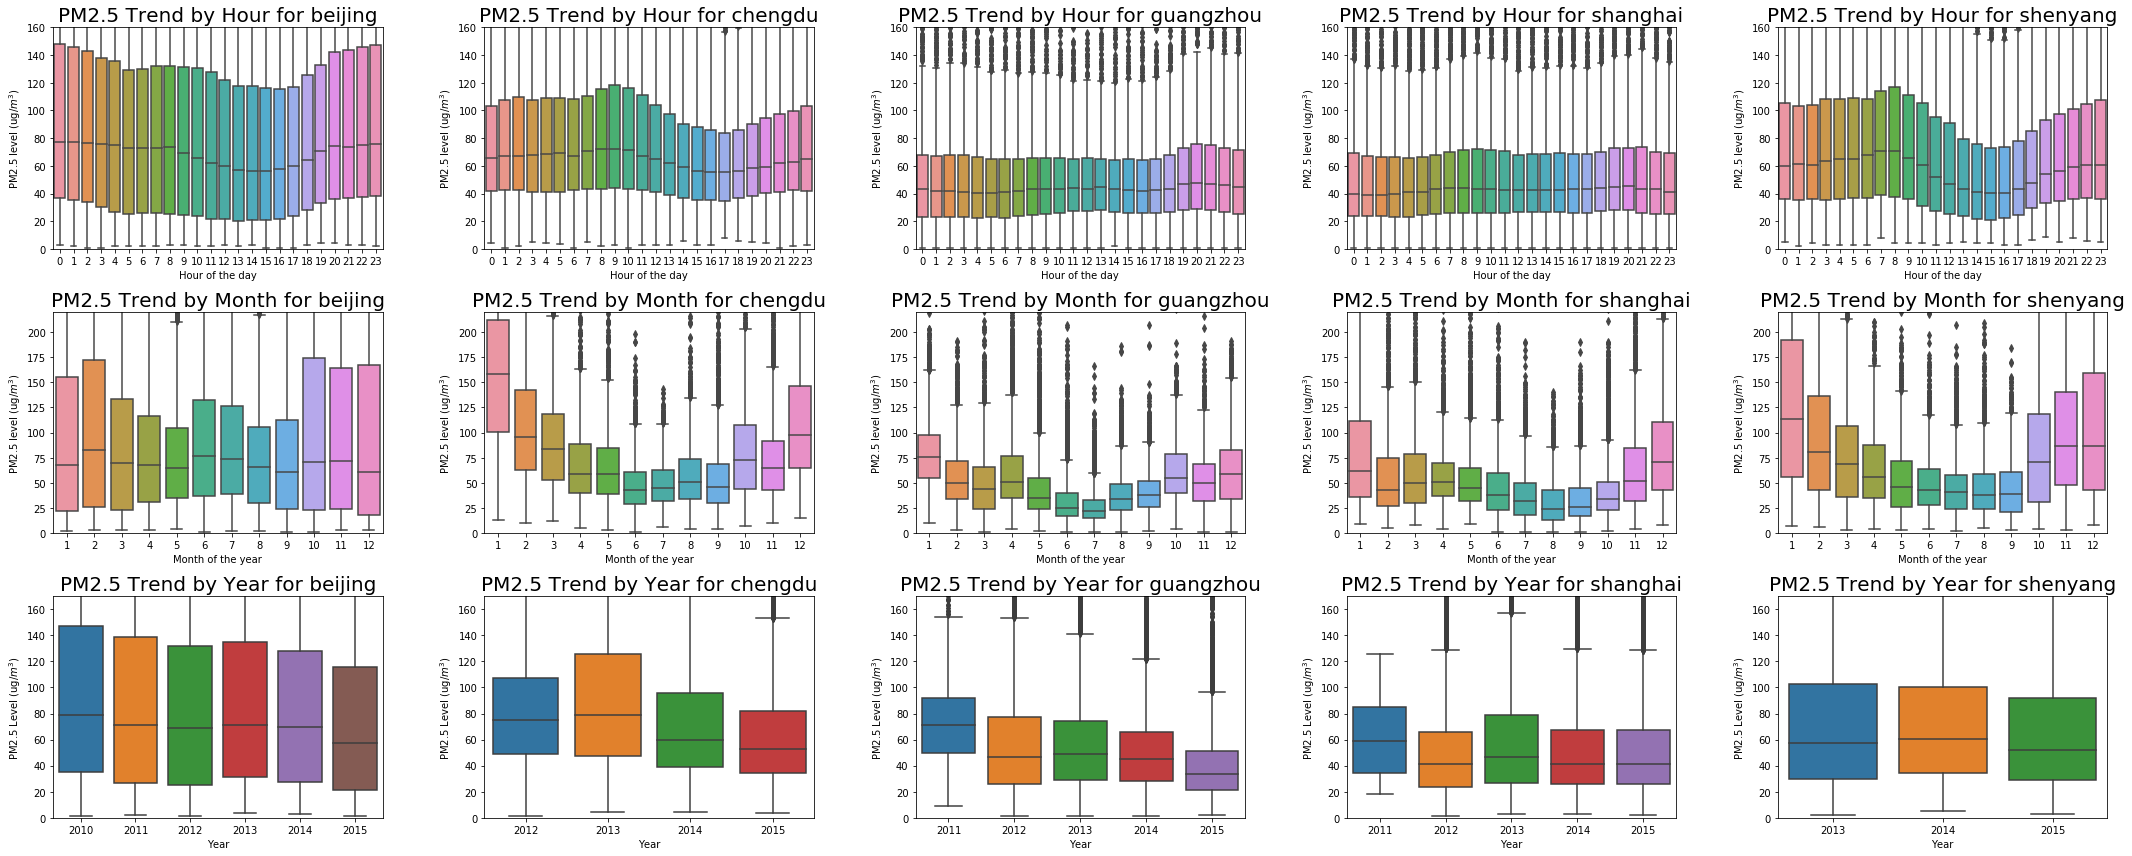

In [131]:
fig = plt.figure(figsize=(30,12))
i,j,k = 1,6,11

for city in (bj,cd,gz,sh,sy): # plot the trends for all five cities
    #plot 'pm_average' by hour of the day
    ax1 = fig.add_subplot(3,5,i)
    sns.boxplot(x='hour',y='pm_average',data=city,ax=ax1)
    plt.ylim([0,160]);
    plt.xlabel('Hour of the day');
    plt.ylabel('PM2.5 level (ug/$m^3$)');
    plt.title('PM2.5 Trend by Hour for {}'.format(city['city'].unique()[0]), fontsize=20);
    i += 1
    
    #plot 'pm_average' by month of the year
    ax2 = fig.add_subplot(3,5,j)
    sns.boxplot(x='month', y='pm_average',data=city,ax=ax2)
    plt.ylim([0,220]);
    plt.xlabel('Month of the year');
    plt.ylabel('PM2.5 level (ug/$m^3$)');
    plt.title('PM2.5 Trend by Month for {}'.format(city['city'].unique()[0]),fontsize=20);
    j += 1
    
    #plot 'pm_average' by year
    ax3 = fig.add_subplot(3,5,k)
    sns.boxplot(x='year',y='pm_average',data=city,ax=ax3)
    plt.ylim([0,170]);
    plt.xlabel('Year');
    plt.ylabel('PM2.5 Level (ug/$m^3$)');
    plt.title('PM2.5 Trend by Year for {}'.format(city['city'].unique()[0]),fontsize=20);
    k +=1

plt.tight_layout();

# To be revised, also consider to include inferential statistical test

Two distinct trends are observed in hour of the day trend: 
* Beijing, Chengdu, Shenyang: larger fluctuations during the 24-hour period;
PM2.5 readings rise slightly during morning rush hours (around 7-9), then drop down afterwards; The readings reach the lowest in the afternoon (around 14-16), then bound back during evening hours; The readings remain relatively high during the night. 
* Shanghai, Guangzhou: only minor fluctuations during the 24-hour period;
PM2.5 readings is slightly higher during the day, with minor increase during evening hours (19-22); during the night, readings us slightly lower.
The differences between the two distinct trends might be due to their physical locations. Shanghai and Guangzhou are coastal cities, whereas Beijing, Chengdu and Shenyang are inland cities. The correlation of PM2.5 and weather data might reveal more insights on the cause of these differences. 

Two distinct trends are observed in month of the year trend:
* Chengdu, Guangzhou, Shanghai and Shenyang: large fluctuations around the year;
These four cities share similar trends, where PM2.5 readings start to drop during spring months and reach the lowest during summer months; PM2.5 readings begin to bound up during fall months and rapidly reach the highest during winter months; In general, readings during winter months are at least twice as high as that during summer months. 
* Beijing: minor fluctuations around the year; 
PM2.5 readings in Beijing doesn't fluctuate from month to month as much as that of other cities. On the contrary, the readings are slightly higher in the summer months and slightly lower during winter and spring months. 

The differences between the two distinct trends might be due to their distinct weather conditions. The correlation between PM2.5 and weather data might reveal more insights on the cause of these differences.

Trends in year-to-year plot:
As shown above, the PM2.5 readings show a downward trend indicative of improving air quality over time, except for year 2013, where a boundback on PM2.5 reading is noticed in four out of the five cities. 
The correlation between PM2.5 and weather data might shed some light on the uniqueness of this year.   

### 3.4 PM2.5 correlation to weather conditions

In [ ]:
Correlation matrix;
correlation with temp, dewp, press, humi, using subplot of 2*2
correlation with wind direction and wind speed
correlation with iprec, ir, is, using subplot of 1*3

## 4. Conclusion and What's next?

In [ ]:
#To do

### 2.4 Cleaned datasets
insert figure using <img src="subdirectory/MyImage.png",width=60,height=60> to show the columns, unit, descriptions for each cleaned dataset